# ANN to Predict Wheel Emotion 1-16
Check [data set description](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html) for details

Setup: Javascript and ipynb stuff

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

## Load Functions

In [1]:
from fastai.vision import *
import os
import numpy as np
import pandas as pd
import pickle

In [2]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/robots')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/robots')

## Load Original Data Labels

In [3]:
path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [4]:
df=df.div(9) #normalize

df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


In [5]:
df=df.subtract(df.mean())
df.head()

,valence,arousal,dominance,liking
0,0.272854,0.271477,0.168583,0.256874
1,0.316188,0.239254,0.210806,0.327985
2,0.369521,0.264810,0.401917,0.173541
3,-0.034924,0.094810,0.081917,0.282430
4,0.189521,-0.137412,0.200806,0.059096


In [6]:
df=df.divide(df.std())
df.head()

,valence,arousal,dominance,liking
0,1.152464,1.209250,0.723768,1.012742
1,1.335492,1.065721,0.905038,1.293102
2,1.560758,1.179554,1.725523,0.684195
3,-0.147508,0.422316,0.351688,1.113497
4,0.800486,-0.612082,0.862105,0.232991


## Set filenames and labels

In [7]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
df['file_name']=filenames
df['subject_label']=subject_labels
# df=df[['file_name','valence','arousal','dominance','liking']]
df=df[['file_name','valence']]
df.tail()

,file_name,valence
1275,S32T36,-0.630891
1276,S32T37,-1.147125
1277,S32T38,-1.034492
1278,S32T39,-0.593347
1279,S32T40,0.889654


In [47]:
# for i in range(1,33):
#     for ii in range(1,41):
#         os.rename(r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/T'+str(ii)+'S'+str(i)+".png",r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/S'+str(i)+'T'+str(ii)+".png")

In [48]:
# from PIL import Image

# for i in range (0,1280):
    
#     im = Image.open(r"/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/"+str(df.file_name[i])+".png")
#     im1=im.crop((0,0,1450,1030))
#     im1.save("/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps_re/"+str(df.file_name[i])+".png")

In [49]:
# df_sub1=df.iloc[0:40]
# df_sub1.tail()

,file_name,valence
35,S1T36,-1.104888
36,S1T37,-1.381777
37,S1T38,-0.903087
38,S1T39,-0.945325
39,S1T40,-0.072419


In [8]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/robots')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/robots')

In [9]:
df.to_csv(path/'labels_proc.csv', index=False)

In [10]:
df = pd.read_csv(path/'labels_proc.csv') #load labels
df.tail()

,file_name,valence
1275,S32T36,-0.630891
1276,S32T37,-1.147125
1277,S32T38,-1.034492
1278,S32T39,-0.593347
1279,S32T40,0.889654


## Data loader

In [11]:
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='heatmaps', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence'],label_cls=FloatList))

In [12]:
data = (src.transform(size=1024)
        .databunch(bs=2).normalize())

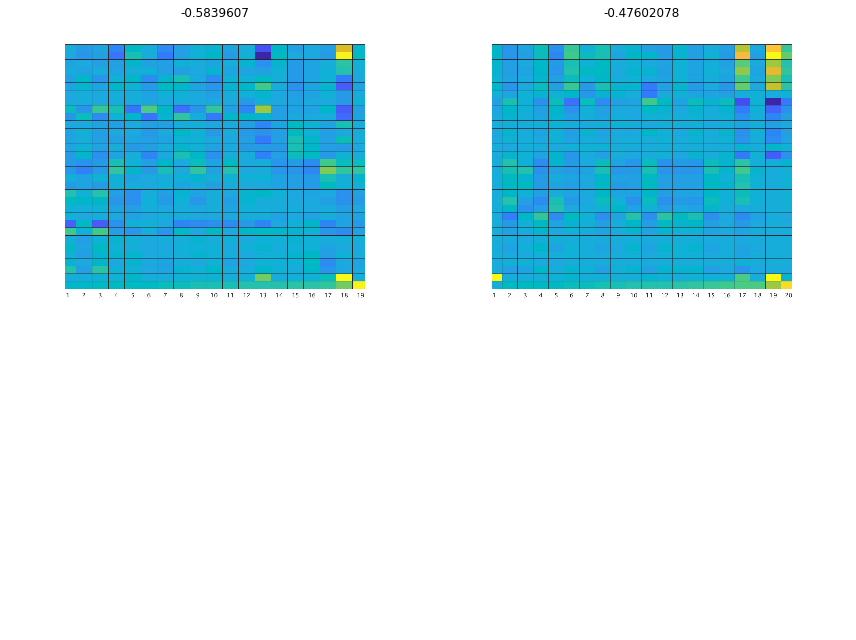

In [13]:
data.show_batch(rows=4, figsize=(12,9))

## Setup Network

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [15]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 512, 512]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 512, 512]       128        True      
______________________________________________________________________
ReLU                 [64, 512, 512]       0          False     
______________________________________________________________________
MaxPool2d            [64, 256, 256]       0          False     
______________________________________________________________________
Conv2d               [64, 256, 256]       4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
Conv2d               [64, 256, 256]       36,864     False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


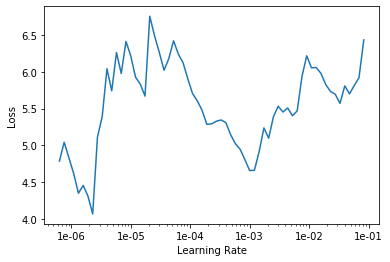

In [16]:
learn.lr_find()
learn.recorder.plot()

## Train head of network

In [17]:
lr = 3e-3
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.358948,2.936930,0.000000,02:35
1,1.992829,1.973142,0.000000,02:35
2,2.064580,1.471768,0.000000,02:39
3,1.698760,1.050891,0.000000,02:36
4,1.553418,1.328609,0.000000,02:35
5,1.346490,1.086543,0.000000,02:37
6,1.206158,1.266774,0.000000,02:38
7,1.090122,1.033197,0.000000,02:36
8,1.094984,1.085677,0.000000,02:36
9,1.108383,1.044631,0.000000,02:38


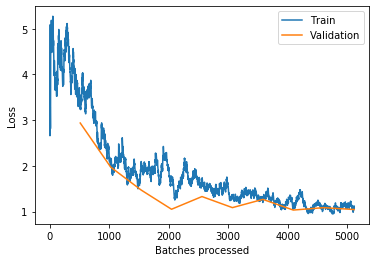

In [18]:
learn.recorder.plot_losses()

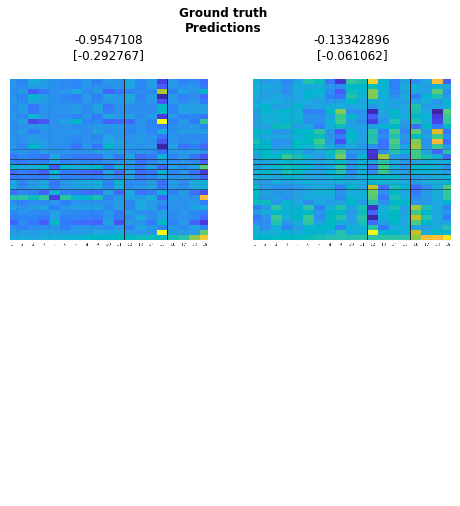

In [19]:
learn.show_results()

## Train the whole network

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


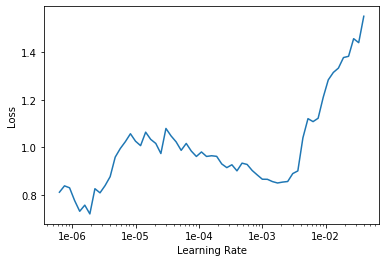

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
lr = 3e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.240301,1.240061,0.000000,03:34
1,1.256738,43.277153,0.000000,03:29
2,1.402821,1.067220,0.000000,03:30
3,1.067157,1.073933,0.000000,03:29
4,1.177471,1.061832,0.000000,03:30


In [19]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.207260,2.031190,0.000000,00:07
1,3.257374,8.533295,0.000000,00:07
2,3.857800,3.419982,0.000000,00:07
3,3.459852,4.829340,0.000000,00:07
4,3.082296,31.105225,0.000000,00:07
5,3.006646,4.038892,0.000000,00:07
6,2.743620,23.094376,0.000000,00:07
7,2.713896,1.580672,0.000000,00:07
8,2.731858,16.437279,0.000000,00:07
9,2.498107,2.223377,0.000000,00:07


## Interpret and Results

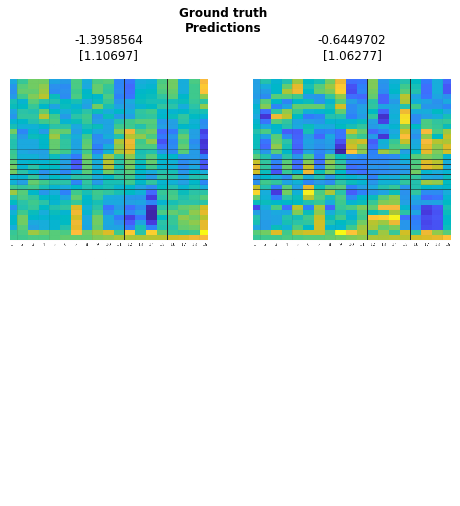

In [20]:
learn.show_results()

In [21]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)